In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import mplhep as hep
import numpy as np
import pandas as pd
plt.style.use([hep.style.ROOT, hep.style.firamath])

In [2]:
df = pd.read_csv(f'../data_files/7.0.2/test.csv', index_col=[0])
model = tf.keras.models.load_model('../neural_network/models/v7.0.2')

2022-03-16 09:26:49.567166: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-03-16 09:26:49.591688: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


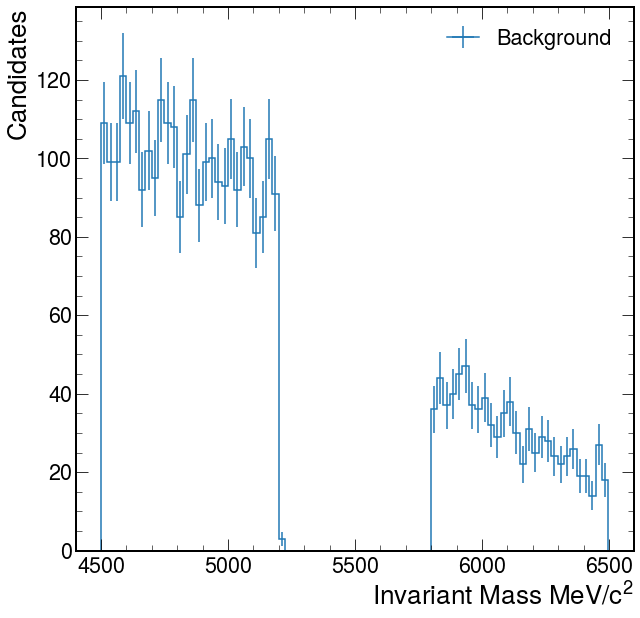

In [16]:
bins = np.concatenate((np.linspace(4500, 5200, 20), np.linspace(5800, 6500, 20)))
h, bins = np.histogram(df['Lb_M'][df['IsSimulated']==False], bins=80)
h1, _ = np.histogram(df['Lb_M'][df['IsSimulated']==True], bins=np.linspace(4500, 6500, 75))

fig, ax = plt.subplots(1, 1)
hep.histplot(h, bins, ax=ax, label='Background', yerr=np.sqrt(h))
#hep.histplot(h1, np.linspace(4500, 6500, 75), ax=ax, label='Signal', yerr=np.sqrt(h1))
plt.ylabel('Candidates')
plt.xlabel(r'Invariant Mass $MeV/c^2$')
plt.legend()
plt.savefig('../images/BG_Mass_Dist.png', dpi=800)
plt.show()

In [4]:
predictions = model.predict(df.drop(['Lb_M', 'IsSimulated', 'category'], axis=1)).flatten()

2022-03-16 09:27:25.814757: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2022-03-16 09:27:25.833576: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 2400145000 Hz


In [5]:
df['pred'] = predictions
df['class'] = np.where(df['pred']>0.85,1,0)

In [35]:
df['CorrectPred'] = np.where(df['category'].to_numpy()==df['class'].to_numpy(),True,False)
# number of signal events incorrectly identified as background

In [37]:
df['CorrectPred'].value_counts()

True    7278
Name: CorrectPred, dtype: int64

In [38]:
purity = np.count_nonzero(np.logical_and(df['class'].to_numpy(), df['category'].to_numpy()))/np.unique(df['class'].to_numpy(), return_counts=True)[1][1]
purity

1.0

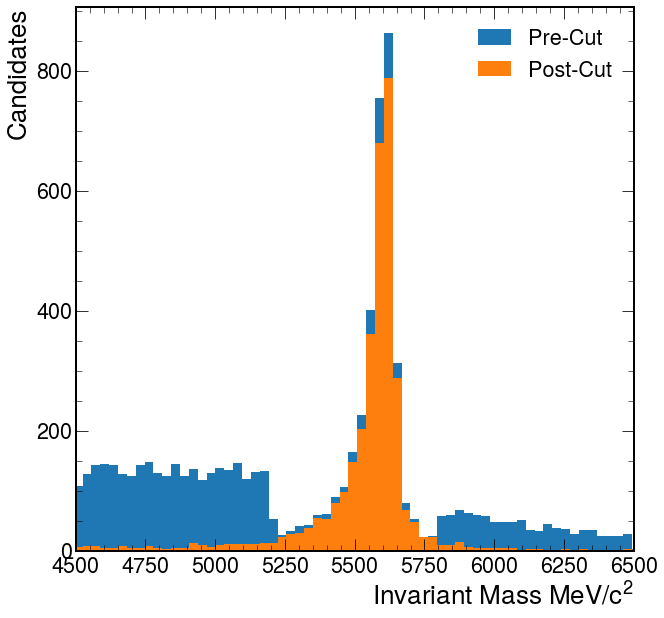

In [13]:
cut_df = df[df['class'] == 1]
h2, _ = np.histogram(cut_df['Lb_M'], bins=bins)

fig, ax = plt.subplots(1, 1)
hep.histplot([h, h2], bins, ax=ax, yerr=[np.sqrt(h), np.sqrt(h2)], label=['Pre-Cut', 'Post-Cut'], stack=False, histtype='fill')
ax.set_xlim(4500, 6500)
plt.ylabel('Candidates')
plt.xlabel(r'Invariant Mass $MeV/c^2$')
plt.legend()
plt.savefig('../images/ModelEval/NN_TestData_MassDist_PrePostCut.png', dpi=800)
plt.show()